In [61]:
ffrom datetime import datetime, timedelta

import fitfile
import pandas as pd
from garmindb import ConfigManager
from garmindb.garmindb import (
    Activities,
    ActivitiesDb,
    Attributes,
    GarminDb,
    garmin_summary_db,
)
from IPython.display import display_markdown

In [62]:
# Local import
from garmin_analysis.running_activity import RunningActivity

In [63]:
db_params_dict = ConfigManager.get_db_params()

garmin_db = GarminDb(db_params_dict)
garmin_summary_db = garmin_summary_db.GarminSummaryDb(db_params_dict)
garmin_act_db = ActivitiesDb(db_params_dict)
measurement_system = Attributes.measurements_type(garmin_db)
unit_strings = fitfile.units.unit_strings[measurement_system]
distance_units = {"kilometers": "km"}[
    unit_strings[fitfile.units.UnitTypes.distance_long]
]

In [64]:
running_activities = Activities.get_by_sport(garmin_act_db, "running")

In [65]:
last_7_days = [
    x for x in running_activities if x.start_time > datetime.now() - timedelta(days=7)
]

In [67]:
data = []
for x in running_activities:
    data.append({"start_time": x.start_time, "distance": x.distance})

In [68]:
df = pd.DataFrame(data).set_index("start_time")

In [69]:
df2 = df.resample("1d").sum()

<Axes: title={'center': '10-day rolling mean distance'}, xlabel='start_time'>

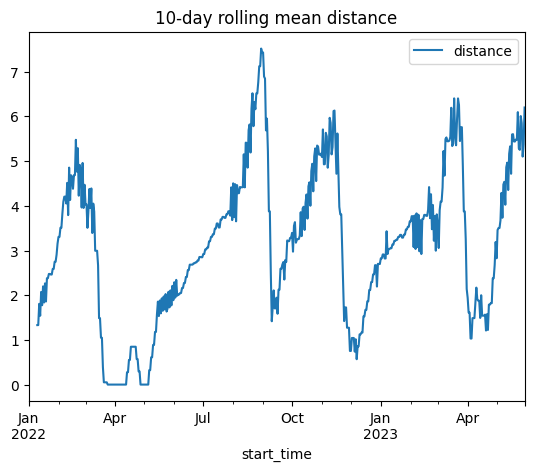

In [74]:
rolling = 10
df2.loc[df2.index >= datetime(2022, 1, 1)].rolling(rolling).mean().plot(
    title=f"{rolling}-day rolling mean distance in km"
)